In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [5]:
#Step 1:Load Data
california=fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df['Price']=california.target
print("Dataset (first 5 rows):\n",df.head())

Dataset (first 5 rows):
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [7]:
#Step 2:EDA
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

In [8]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

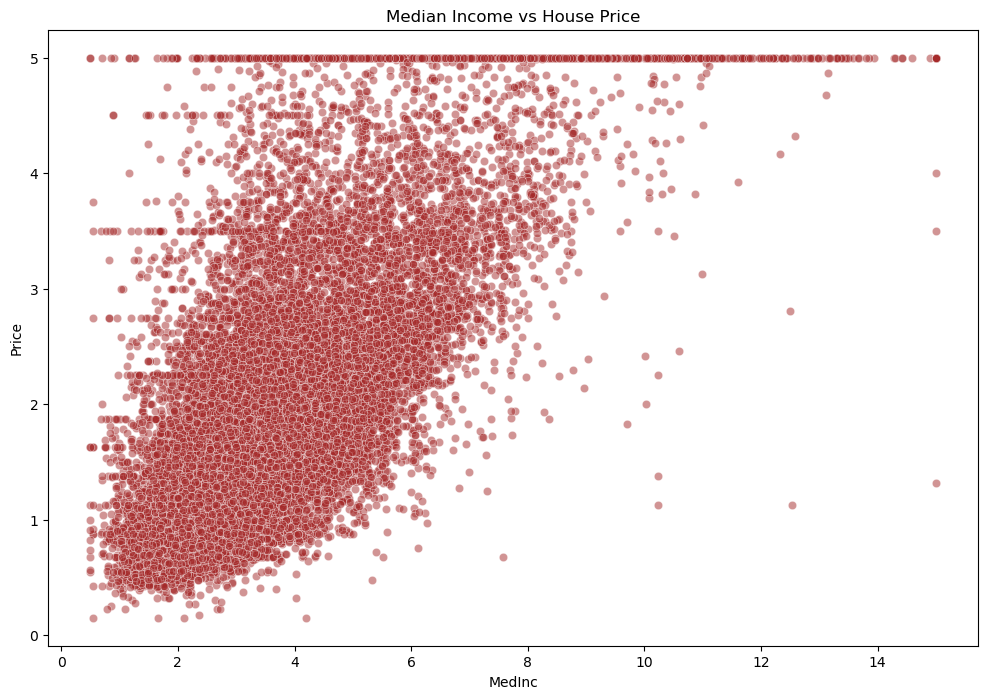

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='MedInc',y='Price',data=df,alpha=0.5,color='brown')
plt.title('Median Income vs House Price')
plt.show()

In [16]:
print("Correlation with Price:\n",df.corr()['Price'].sort_values())

Correlation with Price:
 Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
Price         1.000000
Name: Price, dtype: float64


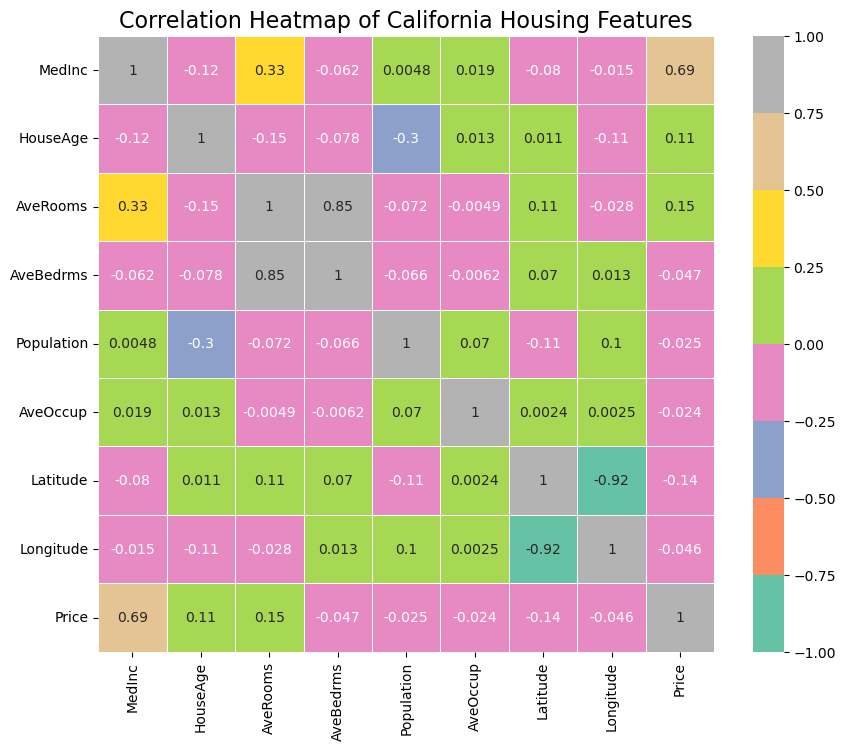

In [20]:
corr_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='Set2',vmin=-1,vmax=1,center=0,square=True,linewidths=0.5)
plt.title('Correlation Heatmap of California Housing Features',fontsize=16)
plt.show()

In [21]:
#Prepare Data
x=df[['MedInc']]
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
#Linear Regression
model=LinearRegression()
model.fit(x_train,y_train)
print(f'Linear Equation: Price={model.coef_[0]:.2f} * MedInc + {model.intercept_:.2f}')

Linear Equation: Price=0.42 * MedInc + 0.44


In [26]:
#Predict and Evaluate
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print(f"MSE :{mse:.2f}")
mae=mean_absolute_error(y_test,y_pred)
print(f"MAE :{mae:.2f}")
rmse=np.sqrt(mse)
print(f"RMSE :{rmse:.2f}")
r2=r2_score(y_test,y_pred)
print(f"R2 Score  :{r2:.2f}")

MSE :0.71
MAE :0.63
RMSE :0.84
R2 Score  :0.46


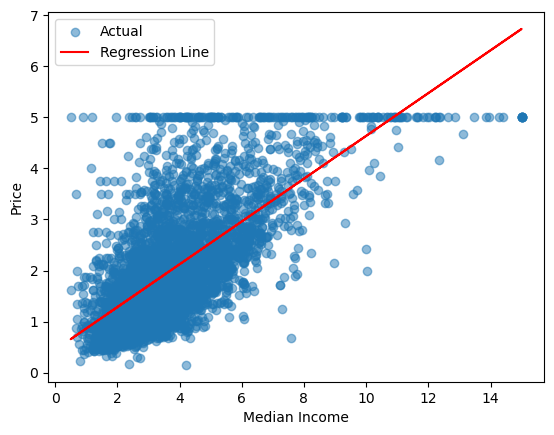

In [33]:
scatter = plt.scatter(x_test,y_test,label='Actual',alpha=0.5)
#scatter = plt.scatter(x_test,y_pred,label='Predicted',alpha=0.5)
graph = plt.plot(x_test,y_pred,label='Regression Line',color='red')
plt.xlabel('Median Income')
plt.ylabel('Price')
plt.legend()
plt.show(graph)